In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob

#kids without ADHD: 3
#kids with ADHD: 4, 5, 6, 9, 10

/home/a/arisvoin/zara1252/.conda/envs/3.6_nilearn_01/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in arctanh
/home/a/arisvoin/zara1252/.conda/envs/3.6_nilearn_01/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in arctanh


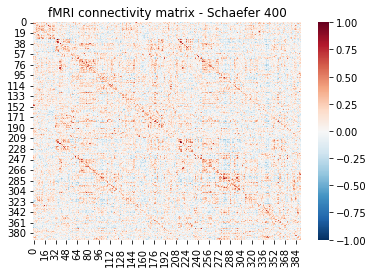

In [50]:
## load in the parcellated data - commenting out because it's going in the for loop
#ptseries_glasser392_file = '/scratch/a/arisvoin/zara1252/updated_clara_local_data/local/parcellated/atlas-GlasserTianS2/ptseries/sub-04/ses-T1/func/sub-04_ses-T1_task-VLD_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii'
#glasser_ptseries_nib = nib.load(ptseries_glasser392_file)
#glasser_ptseries_nib.get_fdata().shape

'''GETTING ALL THE FILES'''
files = sorted(glob.glob("/scratch/a/arisvoin/zara1252/updated_clara_local_data/local/parcellated/atlas-GlasserTianS2/ptseries/**/ses-T1/func/*_ses-T1_task-VLD_atlas-GlasserTianS2_desc-cleaneds0_bold.ptseries.nii", recursive = True))

list_of_paths = [] #creating a list to store
list_of_matrices = [] #creates another list to store the matrices

for file in files: # appending the stored things here
    list_of_paths.append(file)

    
'''CREATING THE CONNECTIVITY MATRIX'''
#the for loop creating the connectivity matrices
for i in list_of_paths:
    ptseries_glasser392_file = i
    glasser_ptseries_nib = nib.load(ptseries_glasser392_file)
    #print(glasser_ptseries_nib.get_fdata().shape) -> testing
    
    ## creating the correlation matrix using pandas
    ts_data = glasser_ptseries_nib.get_fdata()
    ts_df = pd.DataFrame(glasser_ptseries_nib.get_fdata(), columns=schaefer400_parcels )
    glasser392_corZ_pd = np.arctanh(ts_df.corr())


    ts_cor_df = ts_df.corr()  ## you can just call corr() on the pandas dataframe to get a correlation matrix
    ts_corZ_df = np.arctanh(ts_cor_df) ## the Fisher's r-to-z transform - we usually do this before stats
    list_of_matrices.append(ts_corZ_df)

    
'''ARRAY THINGS'''
matrices_array = np.array(list_of_matrices) #creates an array that stores all the matrices

averaged_array = np.array(matrices_array).mean(axis=0) #averages the matrices here

#print(averaged_array) -> testing

## plotting this correlation matrix using seaborn
## note that seaborn skips a bunch of the parcelnames because they don't fit..
plt1 = sns.heatmap(averaged_array, vmin=-1, vmax=1, cmap="RdBu_r").set_title("fMRI connectivity matrix - Glasser 392")
    

In [23]:
## creating the correlation matrix using pandas
ts_data = glasser_ptseries_nib.get_fdata()
ts_df = pd.DataFrame(glasser_ptseries_nib.get_fdata(), columns=schaefer400_parcels )
glasser392_corZ_pd = np.arctanh(ts_df.corr())


ts_cor_df = ts_df.corr()  ## you can just call corr() on the pandas dataframe to get a correlation matrix
ts_corZ_df = np.arctanh(ts_cor_df) ## the Fisher's r-to-z transform - we usually do this before stats
ts_corZ_df

/home/a/arisvoin/zara1252/.conda/envs/3.6_nilearn_01/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in arctanh
  after removing the cwd from sys.path.
/home/a/arisvoin/zara1252/.conda/envs/3.6_nilearn_01/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in arctanh
  


,aHIP-rh,pHIP-rh,lAMY-rh,mAMY-rh,THA-DP-rh,THA-VP-rh,THA-VA-rh,THA-DA-rh,NAc-shell-rh,NAc-core-rh,...,L_p47r_ROI,L_TGv_ROI,L_MBelt_ROI,L_LBelt_ROI,L_A4_ROI,L_STSva_ROI,L_TE1m_ROI,L_PI_ROI,L_a32pr_ROI,L_p24_ROI
aHIP-rh,inf,0.645363,0.373886,0.326632,0.059900,0.436077,0.265177,-0.161837,0.320642,0.446849,...,0.143557,0.084794,0.028335,-0.283021,-0.039484,0.327335,0.173276,-0.125467,-0.112814,0.259866
pHIP-rh,0.645363,inf,-0.090100,-0.032763,-0.111319,0.416535,0.241588,0.108165,0.071515,0.300529,...,-0.071143,-0.103745,0.065588,-0.056349,0.314001,0.369306,-0.014107,0.218275,-0.127574,0.418993
lAMY-rh,0.373886,-0.090100,inf,0.547030,0.387063,0.661236,0.128288,0.044616,0.166752,0.215580,...,0.173214,0.342138,0.419192,-0.142632,0.309336,-0.142288,0.347473,0.081783,0.093433,0.031257
mAMY-rh,0.326632,-0.032763,0.547030,inf,0.531975,0.206651,-0.036936,-0.015414,0.284051,0.542657,...,0.925112,0.370060,-0.157946,-0.642901,0.006604,0.121731,0.423537,-0.270501,0.400507,0.385686
THA-DP-rh,0.059900,-0.111319,0.387063,0.531975,inf,0.383866,0.347974,0.135452,0.604537,0.468404,...,0.368672,0.285190,0.201745,0.128019,0.304787,-0.303460,0.103533,0.162752,-0.056924,0.012193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L_STSva_ROI,0.327335,0.369306,-0.142288,0.121731,-0.303460,-0.147113,-0.033895,-0.146060,-0.142348,-0.005152,...,0.029097,-0.260440,-0.288076,-0.407981,0.165600,inf,0.282195,-0.497802,0.073802,0.460688
L_TE1m_ROI,0.173276,-0.014107,0.347473,0.423537,0.103533,0.327545,0.440124,0.207216,-0.202599,-0.094083,...,0.238910,0.115940,0.381915,-0.306976,0.203470,0.282195,inf,-0.287551,-0.092111,0.379187
L_PI_ROI,-0.125467,0.218275,0.081783,-0.270501,0.162752,0.255104,0.005228,0.104379,0.165755,0.232369,...,-0.241194,0.130471,0.447803,0.543622,0.231959,-0.497802,-0.287551,inf,-0.455626,-0.053647
L_a32pr_ROI,-0.112814,-0.127574,0.093433,0.400507,-0.056924,-0.224963,-0.317561,-0.137710,-0.233700,-0.106830,...,0.459472,-0.274710,-0.367256,-0.565978,0.074528,0.073802,-0.092111,-0.455626,inf,0.142024


In [10]:
## there's also lot's of new parcel names - let's only print the first 30
schaefer400_parcels = schaefer_ptseries_nib.header.get_axis(1).name
schaefer400_parcels[0:30]

array(['aHIP-rh', 'pHIP-rh', 'lAMY-rh', 'mAMY-rh', 'THA-DP-rh',
       'THA-VP-rh', 'THA-VA-rh', 'THA-DA-rh', 'NAc-shell-rh',
       'NAc-core-rh', 'pGP-rh', 'aGP-rh', 'aPUT-rh', 'pPUT-rh', 'aCAU-rh',
       'pCAU-rh', 'aHIP-lh', 'pHIP-lh', 'lAMY-lh', 'mAMY-lh', 'THA-DP-lh',
       'THA-VP-lh', 'THA-VA-lh', 'THA-DA-lh', 'NAc-shell-lh',
       'NAc-core-lh', 'pGP-lh', 'aGP-lh', 'aPUT-lh', 'pPUT-lh'],
      dtype='<U12')

/home/a/arisvoin/zara1252/.conda/envs/3.6_nilearn_01/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in arctanh
  after removing the cwd from sys.path.


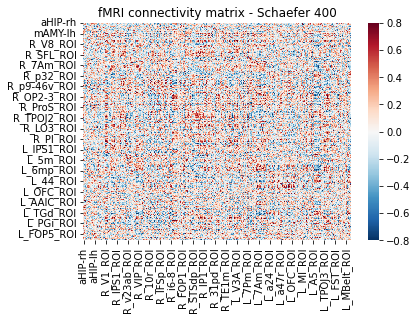

In [11]:

## plotting this correlation matrix using seaborn
## note that seaborn skips a bunch of the parcelnames because they don't fit..
plt1 = sns.heatmap(schaefer400_corZ_pd, vmin=-.8, vmax=.8, cmap="RdBu_r").set_title("fMRI connectivity matrix - Schaefer 400")